# Explore here

In [1]:
# Your code
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:
total_data.shape

(3140, 108)

In [3]:
total_data.isnull().sum().sum()

0

Data Types: only two categorical

In [4]:
total_data.info()

categorical_data = total_data.select_dtypes(include=['object']).columns.tolist()
print("Object columns:", categorical_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
Object columns: ['COUNTY_NAME', 'STATE_NAME']


In [5]:
total_data.count()

fips                      3140
TOT_POP                   3140
0-9                       3140
0-9 y/o % of total pop    3140
19-Oct                    3140
                          ... 
CKD_prevalence            3140
CKD_Lower 95% CI          3140
CKD_Upper 95% CI          3140
CKD_number                3140
Urban_rural_code          3140
Length: 108, dtype: int64

In [6]:
pd.set_option('display.max_columns', None)

Eliminate Duplicates

In [7]:
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (3140, 108)
Dimensions after dropping duplicates: (3140, 108)


Factorising Categoricals

In [8]:
total_data['COUNTY_NAME_N'] = pd.factorize(total_data['COUNTY_NAME'])[0]
total_data['STATE_NAME_N'] = pd.factorize(total_data['STATE_NAME'])[0]

In [9]:
# Drop the original categorical columns
total_data = total_data.drop(['COUNTY_NAME', 'STATE_NAME'], axis=1)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,COUNTY_NAME_N,STATE_NAME_N
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3,0,0
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4,1,0
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,

Feature Engineering and Training and Testing Data

In [10]:
X = total_data.drop('Heart disease_number', axis = 1)
y = total_data['Heart disease_number']

In [11]:
X.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,COUNTY_NAME_N,STATE_NAME_N
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3,0,0
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4,1,0
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,1048,4.212049,12209,49.069571,12

In [12]:
y

0        3345
1       13414
2        2159
3        1533
4        4101
        ...  
3135     1862
3136      981
3137     1034
3138      500
3139      471
Name: Heart disease_number, Length: 3140, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
nrows, ncolumns = total_data.shape

print(f"Our entire dataset has {nrows} rows.")
print(f"Our training set should have 80% of our data so it should have {int(0.8*nrows)} rows.")
print(f"Our test set should have 20% of our data so it should have {int(0.2*nrows)} rows.")

Our entire dataset has 3140 rows.
Our training set should have 80% of our data so it should have 2512 rows.
Our test set should have 20% of our data so it should have 628 rows.


Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.feature_selection import f_classif, SelectKBest

# select k, as there are more than 100 columns theres no way to iterate through all, so a percentage is picked
k = int(X_train.shape[1]*0.2) # 20% of all data
selection_model = SelectKBest(f_classif, k = k)

# Notice that we are using X_train_scaled and y_train here
selection_model.fit(X_train_scaled, y_train)

SelectKBest(k=21)

In [19]:
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])

X_train_sel.head()

,TOT_POP,20-29,30-39,60-69,70-79,80+,White-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,POP_ESTIMATE_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,POVALL_2018,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.292464,-0.277628,-0.269825,-0.314418,-0.317154,-0.303970,-0.312339,-0.136075,-0.107715,-0.292464,-0.211380,-0.347326,-0.305572,-0.273943,-0.313452,-0.291823,-0.313485,-0.315552,-0.345231,-0.289221,-0.294233
1,-0.201736,-0.196128,-0.190015,-0.214120,-0.206911,-0.200058,-0.198612,-0.131903,-0.100877,-0.201736,-0.125544,-0.196556,-0.200658,-0.187966,-0.203732,-0.200555,-0.194123,-0.198437,-0.207900,-0.186870,-0.193348
2,-0.185616,-0.207875,-0.196551,-0.141067,-0.128033,-0.135482,-0.164627,-0.134450,-0.104296,-0.185616,-0.156371,-0.154898,-0.158964,-0.202162,-0.135822,-0.179717,-0.167751,-0.170411,-0.156748,-0.159050,-0.166691
3,-0.113361,-0.137353,-0.120655,-0.088433,-0.078906,-0.062055,-0.097141,-0.123491,-0.096176,-0.113361,-0.097730,-0.094598,-0.064331,-0.081177,-0.073187,-0.113299,-0.070407,-0.081742,-0.011198,-0.050238,-0.085958
4,-0.301948,-0.282438,-0.274474,-0.334181,-0.343772,-0.320360,-0.324612,-0.137613,-0.111989,-0.301948,-0.212565,-0.359695,-0.322390,-0.279652,-0.333457,-0.302102,-0.324761,-0.326713,-0.358635,-0.300428,-0.307242


In [20]:
# relevance of variables for prediction
dict(zip(X_train.columns,selection_model.scores_))

{'fips': 1.0453007518879824,
 'TOT_POP': 548.4411624131174,
 '0-9': 422.70257904468303,
 '0-9 y/o % of total pop': 0.7278130911176582,
 '19-Oct': 306.9388844661491,
 '10-19 y/o % of total pop': 0.7541039991643536,
 '20-29': 489.2738064391093,
 '20-29 y/o % of total pop': 1.4086193114788248,
 '30-39': 521.4964079798139,
 '30-39 y/o % of total pop': 1.0850082581111036,
 '40-49': 453.96647361555046,
 '40-49 y/o % of total pop': 1.053734465938504,
 '50-59': 374.8323061161236,
 '50-59 y/o % of total pop': 1.0707261858453148,
 '60-69': 725.5576732273677,
 '60-69 y/o % of total pop': 0.9083107720838659,
 '70-79': 2610.0432506122256,
 '70-79 y/o % of total pop': 0.8717548116636208,
 '80+': 907.7266156591298,
 '80+ y/o % of total pop': 1.0860918156756867,
 'White-alone pop': 504.1283583250516,
 '% White-alone': 0.8651991418782814,
 'Black-alone pop': 231.0791041169554,
 '% Black-alone': 1.0208026423368355,
 'Native American/American Indian-alone pop': 24.06273184475717,
 '% NA/AI-alone': 0.4367

Linear vs Lasso

In [44]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

#Train linear regression and Lasso regression models using default attributes

# Linear regression
linear_model = LinearRegression()
linear_model.fit(X_train_sel, y_train)
linear_r2 = r2_score(y_test, linear_model.predict(X_test_sel))

# Lasso regression with different alpha values
alphas = np.linspace(0.0, 20, 100)  # Generate alpha values from 0.0 to 20
lasso_r2_values = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_sel, y_train)
    lasso_r2 = r2_score(y_test, lasso_model.predict(X_test_sel))
    lasso_r2_values.append(lasso_r2)



/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.422e+08, tolerance: 6.196e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

Graphing Changes

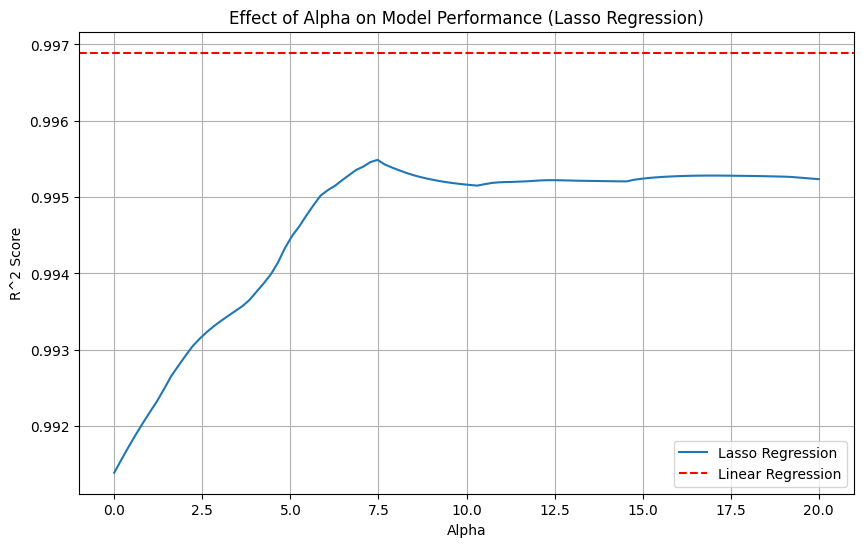

In [45]:

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_r2_values, label='Lasso Regression')
plt.axhline(y=linear_r2, color='r', linestyle='--', label='Linear Regression')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Effect of Alpha on Model Performance (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()